![Sleep Health and Lifestyle Banner](banner_image.png)

# Final Project

By Jyo Madhavarapu and Likith Kancharlapalli

Resources used: Class notes, Data Camp, AI feature on Datalab, Markdown for Database, Stack Overflow, Grammarly
Technology use: GitHub, Pandas, Numpy, Seaborn, Matplotlib, Docker

---


## **1. Defining the Questions**

Sleep plays an important role in our day-to-day lives.  As humans, we have 168 hours in a week, and on average, individuals spend nearly one-third of that time sleeping. From our elders and science, we were taught that sleep helps humans in growth, replenishes functions, and enables us to carry out cognitive activities, among other benefits. However, despite its prominence, many individuals tend to struggle with poor sleep quality and sleep disorders such as insomnia and more.

The main goal of the project is to understand how lifestyle habits, demographic characteristics, and health indicators affect an individual’s sleep quality and risk of sleep disorders. By analyzing the relationships, the project aims to identify patterns that can help individuals achieve better sleep quality than others.

The team aims to achieve the following objectives through answering the following questions mentioned below:
- Which lifestyle factors could contribute to a sleep disorder?
- Does the Occupation of the individual have any correlation to sleep?
- Does an increased physical activity level result in a better quality of sleep?
- Which measurable factors (e.g., sleep duration, stress, blood pressure category) serve as significant predictors of subjective sleep quality?
- Do age and gender have an impact on the quality of sleep and the duration of sleep?
- Which sleep disorders are easiest or hardest for a predictive model to distinguish?
- Which machine-learning model performs best for sleep-disorder prediction?
- How well do models generalize under cross-validation?

The team predicts the following hypothesis for the project:
- Individuals with higher stress levels and lower physical activity are more likely to have a sleeping disorder.
- Specific occupations will correlate with shorter sleep duration and poor sleep quality.
- Physical Activity helps increase sleep quality.
- Sleep duration, stress level, BMI category, blood pressure, and heart rate will serve as significant predictors of subjective sleep quality.
- Age and Gender will have an impact on speed and quality.
- The predictive model will more easily distinguish “No Sleep Disorder” from the other categories than it will distinguish between Insomnia and Sleep Apnea.
- Flexible methods, such as random forest, will outperform simpler linear models in sleep disorder prediction accuracy.

Overall, we hope that these questions and hypotheses shape the direction of our analysis and help us understand what influences sleep quality and sleep disorders.


---

## **2. Data Collection**

After defining the questions to explore, the team moved on to obtaining data for the project and decided to use the following dataset: 

In [4]:
import pandas as pd

# Load the CSV
df = pd.read_csv("data.csv")

# View the first few rows
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

This synthetic dataset contains sleep and cardiovascular metrics, as well as lifestyle factors of close to 400 fictitious persons.

The dataset contains information on individuals’ sleep patterns, lifestyle behaviors, demographic details, and health indicators, where each row represents an individual. The workspace is set up with one CSV file, `data.csv`, with the following columns/variables:

| Column Name                | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| **Person ID**             | Unique identifier for each individual                                                       |
| **Gender**                | Gender of the person (`Male`/`Female`)                                                      |
| **Age**                   | Age in years                                                                                |
| **Occupation**            | Occupation or profession                                                                    |
| **Sleep Duration**        | Average number of hours of sleep per day                                                    |
| **Quality of Sleep**      | Subjective rating on a 1–10 scale                                                           |
| **Physical Activity Level** | Average number of minutes of daily physical activity                                       |
| **Stress Level**          | Subjective rating on a 1–10 scale                                                           |
| **BMI Category**          | BMI category (e.g., `Underweight`, `Normal`, `Overweight`)                                  |
| **Blood Pressure**        | Systolic/diastolic pressure (e.g., `120/80`)                                               |
| **Heart Rate**            | Heart rate in beats per minute                                                              |
| **Daily Steps**           | Number of steps taken per day                                                               |
| **Sleep Disorder**        | One of `None`, `Insomnia`, or `Sleep Apnea`                                                 |

---
### Explaining the unexplained: 
One of the key outcome variables in this dataset is Quality of Sleep, which represents a self-reported, subjective rating of sleep quality on a scale from 1 to 10. While the dataset does not specify how this rating was obtained, lower values indicate poorer sleep quality, whereas higher values indicate a more satisfying and restful sleep. This variable reflects an individual’s perception of restfulness, depth of sleep, and overall satisfaction with their sleep experience. Since sleep quality is a subjective measure, it is influenced by a combination of factors such as sleep duration, stress level, physical activity, and other health-related behaviors. In this project, Quality of Sleep serves as a primary response variable for both exploratory data analysis and predictive modeling.

### Source: 
The dataset is publicly accessible on Kaggle under the title “Sleep Health and Lifestyle Dataset” which simulates realistic sleep, lifestyle, and cardiovascular health patterns. Can be downloaded directly via the Kaggle web interface or API. 

### Citation:  
Tharmalingam, L. (2023). Sleep health and lifestyle dataset (Version 2) [Data set]. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Population & Data: 
The dataset does not represent a specific real-world clinical population, but rather a synthetic/ simulated dataset meant for academic and modeling purposes. Thus, there is no timeframe or collection methods described for the dataset.

### Important note: 
Since the dataset doesn’t come from real patients, all the results are to be interpreted as a demonstration and need to be investigated further on a valid clinical dataset. The reason for using a synthetic dataset is to observe meaningful trends and patterns in a simplified and controlled environment. These observed patterns can then be used to help guide future testing and validation on real-world clinical datasets, where conclusions would carry true medical significance.

---

## **3. Data Cleaning and Preparation**

Before the team proceeds to conduct EDA or predictive modelling, the team must make sure the dataset is clean. in order to make sure the data set is clean, the team must account for the following:
- check for any potential missing values
- replace the missing values
- make the columns easier to read/uncluttered data
- make sure the data is consistent

To fix the following, we must inspect the data for any missing values.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The code above indicates that the dataset contains 374 observations and 13 features. All variables have 374 non-null entries, indicating that no missing values are present in the dataset. Thus, there is no need to replace missing values in the dataset.

However, in case of having missing values in the future when adding more data. We can use the following code to make the dataset more robust and less prone to errors, as it helps us take care of the missing values.

In [6]:
numericCol = [ 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Stress Level', 'Heart Rate', 'Daily Steps', 'SystolicBP', 'DiastolicBP']

categoricalCols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in numericCol:
    if col in df.columns:
        median = df[col].median()
        df[col].fillna(median, inplace=True)


for col in categoricalCols:
    if col in df.columns:
        mode = df[col].mode().iloc[0]
        df[col].fillna(mode, inplace=True)

df.isna().sum()
#df.head()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

The code above replaces all missing values in the numerical columns (such as Age, Sleep Duration, and Quality of Sleep) with the median of each column, and replaces missing values in the categorical columns (such as Gender, Occupation, and BMI Category) with the most frequent category (mode). This approach helps preserve the integrity of the dataset while minimizing the impact of missing data on the analysis and predictive models.

After analyzing the dataset, we observed that one of the columns was difficult to analyze and compare because each of its entries contained a “/” character, making it difficult for direct numerical analysis. To address this issue, this column was separated into two numeric components to enable comparison

In [7]:
bpSplit = df['Blood Pressure'].str.split('/', expand=True)
df['SystolicBP'] = pd.to_numeric(bpSplit[0], errors='coerce')
df['DiastolicBP'] = pd.to_numeric(bpSplit[1], errors='coerce')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SystolicBP,DiastolicBP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


Now that the data can be properly analyzed, the team further categorized blood pressure and physical activity levels to make the dataset easier to work with for both exploratory data analysis (EDA) and predictive modeling.

In [8]:
def bpcategory(row):
    if pd.isna(row['SystolicBP']) or pd.isna(row['DiastolicBP']):
        return np.nan
    if row['SystolicBP'] < 120 and row['DiastolicBP'] < 80:
        return 'Normal'
    elif 120 <= row['SystolicBP'] < 130 and row['DiastolicBP'] < 80:
        return 'Elevated'
    elif (130 <= row['SystolicBP'] < 140) or (80 <= row['DiastolicBP'] < 90):
        return 'Hypertension Stage 1'
    elif row['SystolicBP'] >= 140 or row['DiastolicBP'] >= 90:
        return 'Hypertension Stage 2'
    else:
        return np.nan

df['BPCategory'] = df.apply(bpcategory, axis=1)
df['BPCategory'] = df['BPCategory'].astype('category')


def activitycat(minutes):
    if pd.isna(minutes):
        return np.nan
    if minutes <= 30:
        return 'Low'
    elif minutes <= 60:
        return 'Moderate'
    else:
        return 'High'

df['ActivityCategory'] = df['Physical Activity Level'].apply(activitycat)
df['ActivityCategory'] = df['ActivityCategory'].astype('category')


def stepscat(steps):
    if pd.isna(steps):
        return np.nan
    if steps < 5000:
        return 'Low'
    elif steps <= 8000:
        return 'Moderate'
    else:
        return 'High'

df['StepsCategory'] = df['Daily Steps'].apply(stepscat)
df['StepsCategory'] = df['StepsCategory'].astype('category')


def overallact(row):
    if row['ActivityCategory'] == 'High' or row['StepsCategory'] == 'High':
        return 'High'
    elif row['ActivityCategory'] == 'Moderate' or row['StepsCategory'] == 'Moderate':
        return 'Moderate'
    else:
        return 'Low'

df['OverallActivity'] = df.apply(overallact, axis=1)
df['OverallActivity'] = df['OverallActivity'].astype('category')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SystolicBP,DiastolicBP,BPCategory,ActivityCategory,StepsCategory,OverallActivity
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,126,83,Hypertension Stage 1,Moderate,Low,Moderate
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,125,80,Hypertension Stage 1,Moderate,High,High
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,125,80,Hypertension Stage 1,Moderate,High,High
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2,Low,Low,Low
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension Stage 2,Low,Low,Low


First, the systolic and diastolic blood pressure values were used to create a new feature called BPCategory, which groups each individual’s blood pressure as Normal, Elevated, or High. Turning these numbers into categories makes it much easier to compare people and understand differences in cardiovascular risk.

Next, the Physical Activity Level (measured in minutes) was grouped into an ActivityCategory with three levels: Low, Moderate, and High. This makes it easier to interpret how active someone is, instead of working with raw minute values.

Since the dataset also includes Daily Steps, which reflects overall movement throughout the day rather than just exercise time, a separate StepsCategory was created using step-count cutoffs. This helps capture everyday movement that might not be counted as structured physical activity.

Finally, an OverallActivity feature was created by combining ActivityCategory and StepsCategory. This gives a more complete picture of each person’s true activity level and helps make both the visual analysis and predictive models more effective.

___

## **4. Data Analysis**

### Exploratory Data Analysis:

#### Figure 1: Impact of Lifestyle Factors on Sleep Disorders

,Factor,Test,p-value,Significant (α = 0.05)
3,BMI Category,Chi-Square,2.863593e-18,True
1,Physical Activity Level,One-Way ANOVA,2.403480e-09,True
2,Daily Steps,One-Way ANOVA,1.329102e-08,True
0,Stress Level,One-Way ANOVA,6.941342e-03,True


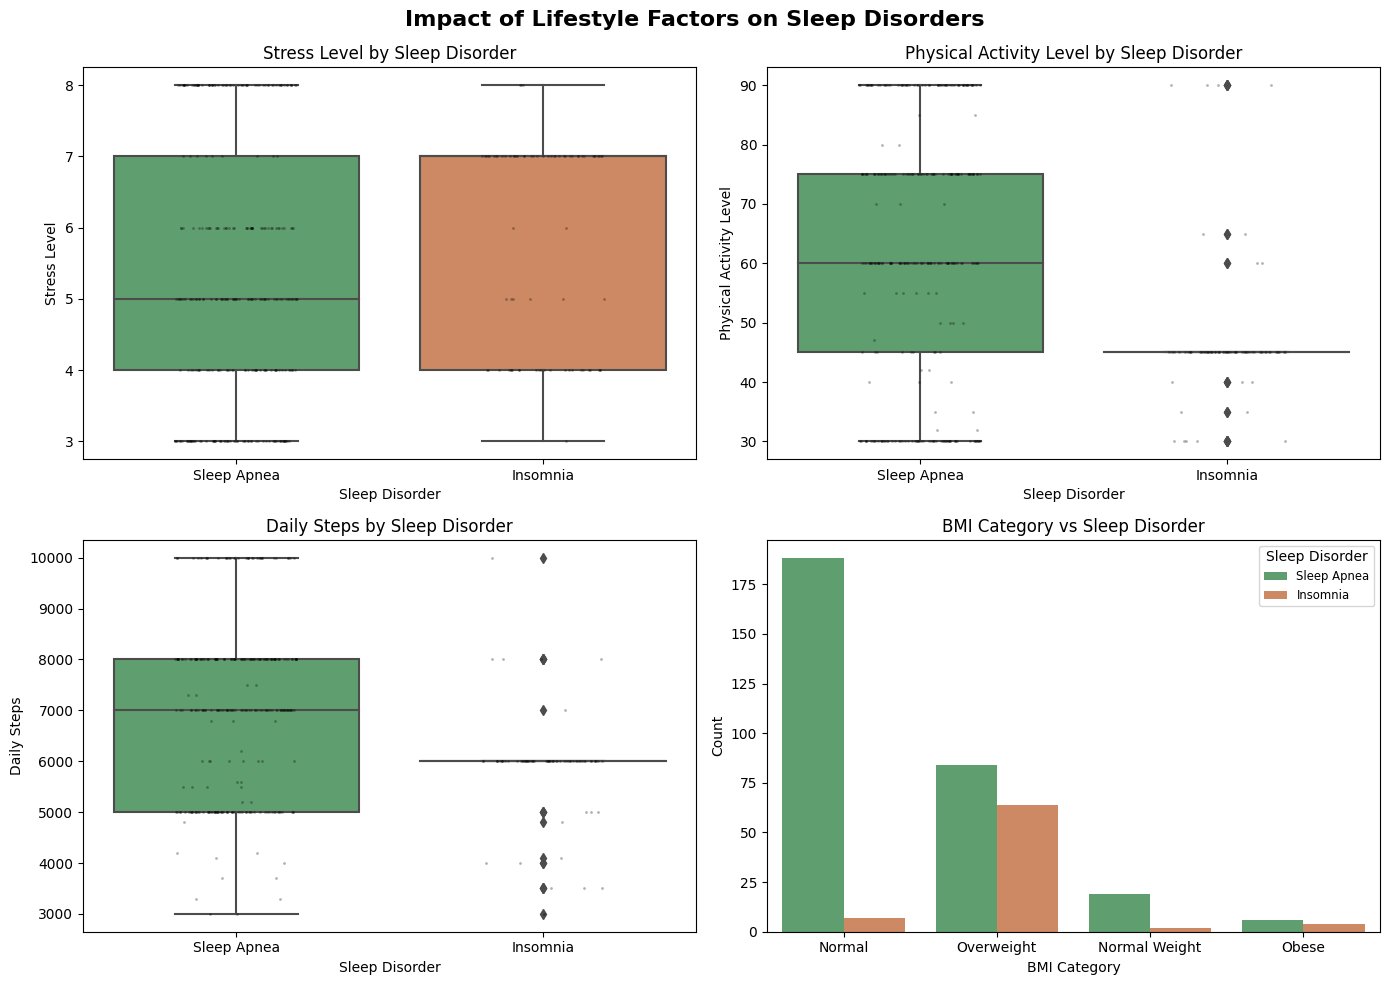

In [9]:
# Which lifestyle factors could contribute to a sleep disorder?
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lifestyle_factors = [ 'Stress Level', 'Physical Activity Level', 'Daily Steps', 'BMI Category']

results = []

for factor in lifestyle_factors:
    if df[factor].dtype == object or str(df[factor].dtype) == 'category':
        # CATEGORICAL → Chi-Square Test
        contingency = pd.crosstab(df[factor], df['Sleep Disorder'])
        chi2, p, dof, ex = stats.chi2_contingency(contingency)
        results.append({'Factor': factor, 'Test': 'Chi-Square', 'p-value': p})
    else:
        # CONTINUOUS → One-Way ANOVA
        groups = [group[factor].dropna() for name, group in df.groupby('Sleep Disorder')]
        f_stat, p = stats.f_oneway(*groups)
        results.append({'Factor': factor, 'Test': 'One-Way ANOVA', 'p-value': p})

results_df = pd.DataFrame(results)
results_df['Significant (α = 0.05)'] = results_df['p-value'] < 0.05

display(results_df.sort_values('p-value'))

sleep_disorder_palette = {
    'None': '#4C72B0',        
    'Insomnia': '#DD8452',     
    'Sleep Apnea': '#55A868'   
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, factor in enumerate(lifestyle_factors):
    ax = axes[i]
    
    if df[factor].dtype == object or str(df[factor].dtype) == 'category':
        order = df[factor].value_counts().index
        sns.countplot(
            x=factor, 
            hue='Sleep Disorder', 
            data=df, 
            ax=ax, 
            order=order,
            palette=sleep_disorder_palette
        )
        ax.set_ylabel("Count")
        ax.set_xlabel(factor)
        ax.set_title(f"{factor} vs Sleep Disorder")
        ax.legend(title='Sleep Disorder', loc='best', fontsize='small')
        
    else:
        sns.boxplot(
            x='Sleep Disorder', 
            y=factor, 
            data=df, 
            ax=ax, 
            palette=sleep_disorder_palette
        )
        sns.stripplot(
            x='Sleep Disorder', 
            y=factor, 
            data=df,
            ax=ax, 
            color='black', 
            alpha=0.3, 
            jitter=0.2, 
            size=2
        )
        ax.set_ylabel(factor)
        ax.set_xlabel("Sleep Disorder")
        ax.set_title(f"{factor} by Sleep Disorder")
        if ax.legend_:
            ax.legend_.remove()

# plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.suptitle(
    "Impact of Lifestyle Factors on Sleep Disorders",
    fontsize=16,
    fontweight='bold'
)
plt.show()

**Purpose:** The purpose of this figure is to see how key lifestyle factors such as stress level, physical activity, daily steps, and BMI category, vary across people with no sleep disorder, sleep apnea, and insomnia. Each subplot isolates a single lifestyle variable to visualize any patterns. The subplots are as follows:
- Top Left: Distribution of stress levels across sleep-disorder groups.
- Top Right: Distribution of physical-activity levels across sleep-disorder groups.
- Bottom Left: Distribution of daily steps across sleep-disorder groups.
- Bottom Right: BMI-category counts stratified by sleep-disorder.

**Method:** The three subplots were shown in boxplots for better visualization of the median, spread, and presence of outliers within each disorder category. By following the Gestalt principle of similarity, the team was able to easily do cross-variable comparisons. Finally, the grouped bar chart for BMI was used to emphasize differences in the number of individuals within each BMI class. Finally, the colors were kept the same across all subplots to help interpretability and provide clarity.

**Interpretation:** The plots suggest that individuals with sleep apnea and insomnia tend to have higher stress levels compared to those without a sleep disorder. Physical activity and daily steps appear highest among those with sleep apnea, while people with insomnia show lower levels of activity overall. In terms of BMI, most individuals without a sleep disorder fall in the normal range, whereas both sleep apnea and insomnia appear more common among individuals classified as overweight. These trends indicate that lifestyle and health-related behaviors differ across the three groups.

**Evaluation:** All in all, these plots support the hypothesis that lifestyle factors may role in identifying or predicting sleep issues. However, there are also some limitations that need to be taken into account. For example, the group sizes are somewhat uneven, which can influence interpretation.

#### Figure 2: Average Sleep Quality by Occupation (Heatmap)

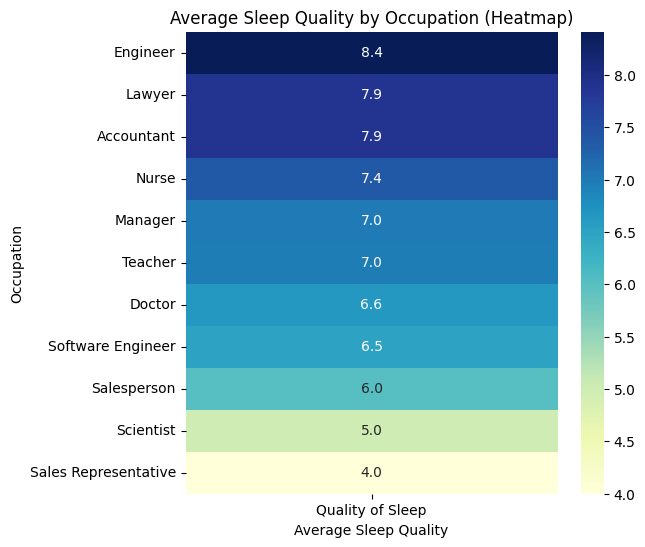

In [10]:
# - Does the Occupation of the individual have any correlation to sleep?
heatmap_data = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data.to_frame(), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Sleep Quality by Occupation (Heatmap)')
plt.xlabel('Average Sleep Quality')
plt.ylabel('Occupation')
plt.show()

**Purpose:** The purpose of this heatmap is to compare average sleep quality across different occupations and identify whether certain professions tend to report better or worse sleep.

**Method:** The team used a heatmap where each occupation was assigned a color based on its mean sleep-quality score. This approach makes it easy to compare values at a glance. A colormap is applied from light to dark to show that the higher sleep quality values stood out. The color gradient makes it easier to identify whether a profession is reporting better or worse sleep.

**Interpretation:** The heatmap shows clear variation in sleep quality among different occupations. Engineers report the highest average sleep quality, followed by lawyers and accountants. Salespersons, scientists, and especially sales representatives show the lowest average sleep quality with other occupations in the middle. These differences suggest that workplace environments, schedules, and/or stress levels may contribute to disparities in sleep quality across professions.

**Evaluation:** All in all, this graph suggests that occupation may play an important role in shaping sleep quality. the heatmap is helpful in showing the sleep quality across professions in a broad sense. However, it does remove the variablity between each job. Differences in sample size across professions also aren’t visible but they could affect interpretation. 

#### Figure 3: Mean Sleep Quality by Activity Category with 95% Confidence Interval

,Mean Quality of Sleep,95% CI Error Bar
High,7.587413,0.182814
Low,7.352941,0.386901
Moderate,7.055215,0.151853


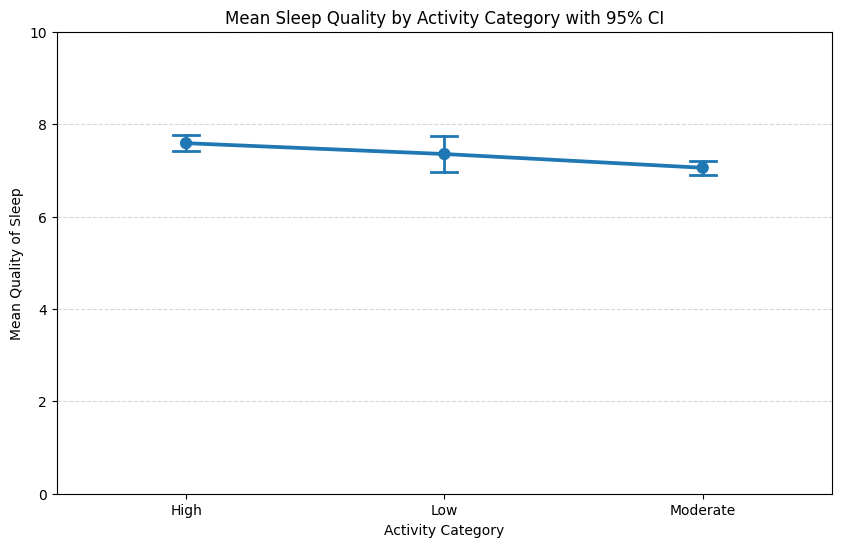

In [11]:
# - Does an increased physical activity level result in a better quality of sleep?
import pandas as pd

activity_order = df['ActivityCategory'].cat.categories

# Calculate means and 95% confidence intervals for each ActivityCategory
summary = (
    df.groupby('ActivityCategory')['Quality of Sleep']
    .agg(['mean', 'count', 'std'])
    .reindex(activity_order)
)
summary['sem'] = summary['std'] / summary['count']**0.5
# 95% CI using normal approximation (z = 1.96)
summary['ci95'] = summary['sem'] * 1.96

error_bar_table = summary[['mean', 'ci95']].rename(
    columns={'mean': 'Mean Quality of Sleep', 'ci95': '95% CI Error Bar'}
)
display(error_bar_table)

# Plot
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='ActivityCategory',
    y='Quality of Sleep',
    data=df,
    order=activity_order,
    capsize=0.1,
    color='C0',
    errwidth=2
)
plt.title("Mean Sleep Quality by Activity Category with 95% CI")
plt.xlabel("Activity Category")
plt.ylabel("Mean Quality of Sleep")
plt.ylim(0, df['Quality of Sleep'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Purpose:

Method:

Interpretation: 

Evaluation:
Accept/Reject Hypothesis

#### Figure 3: Measurable Predictors of Subjective Sleep Quality

/tmp/ipykernel_52/76169601.py:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


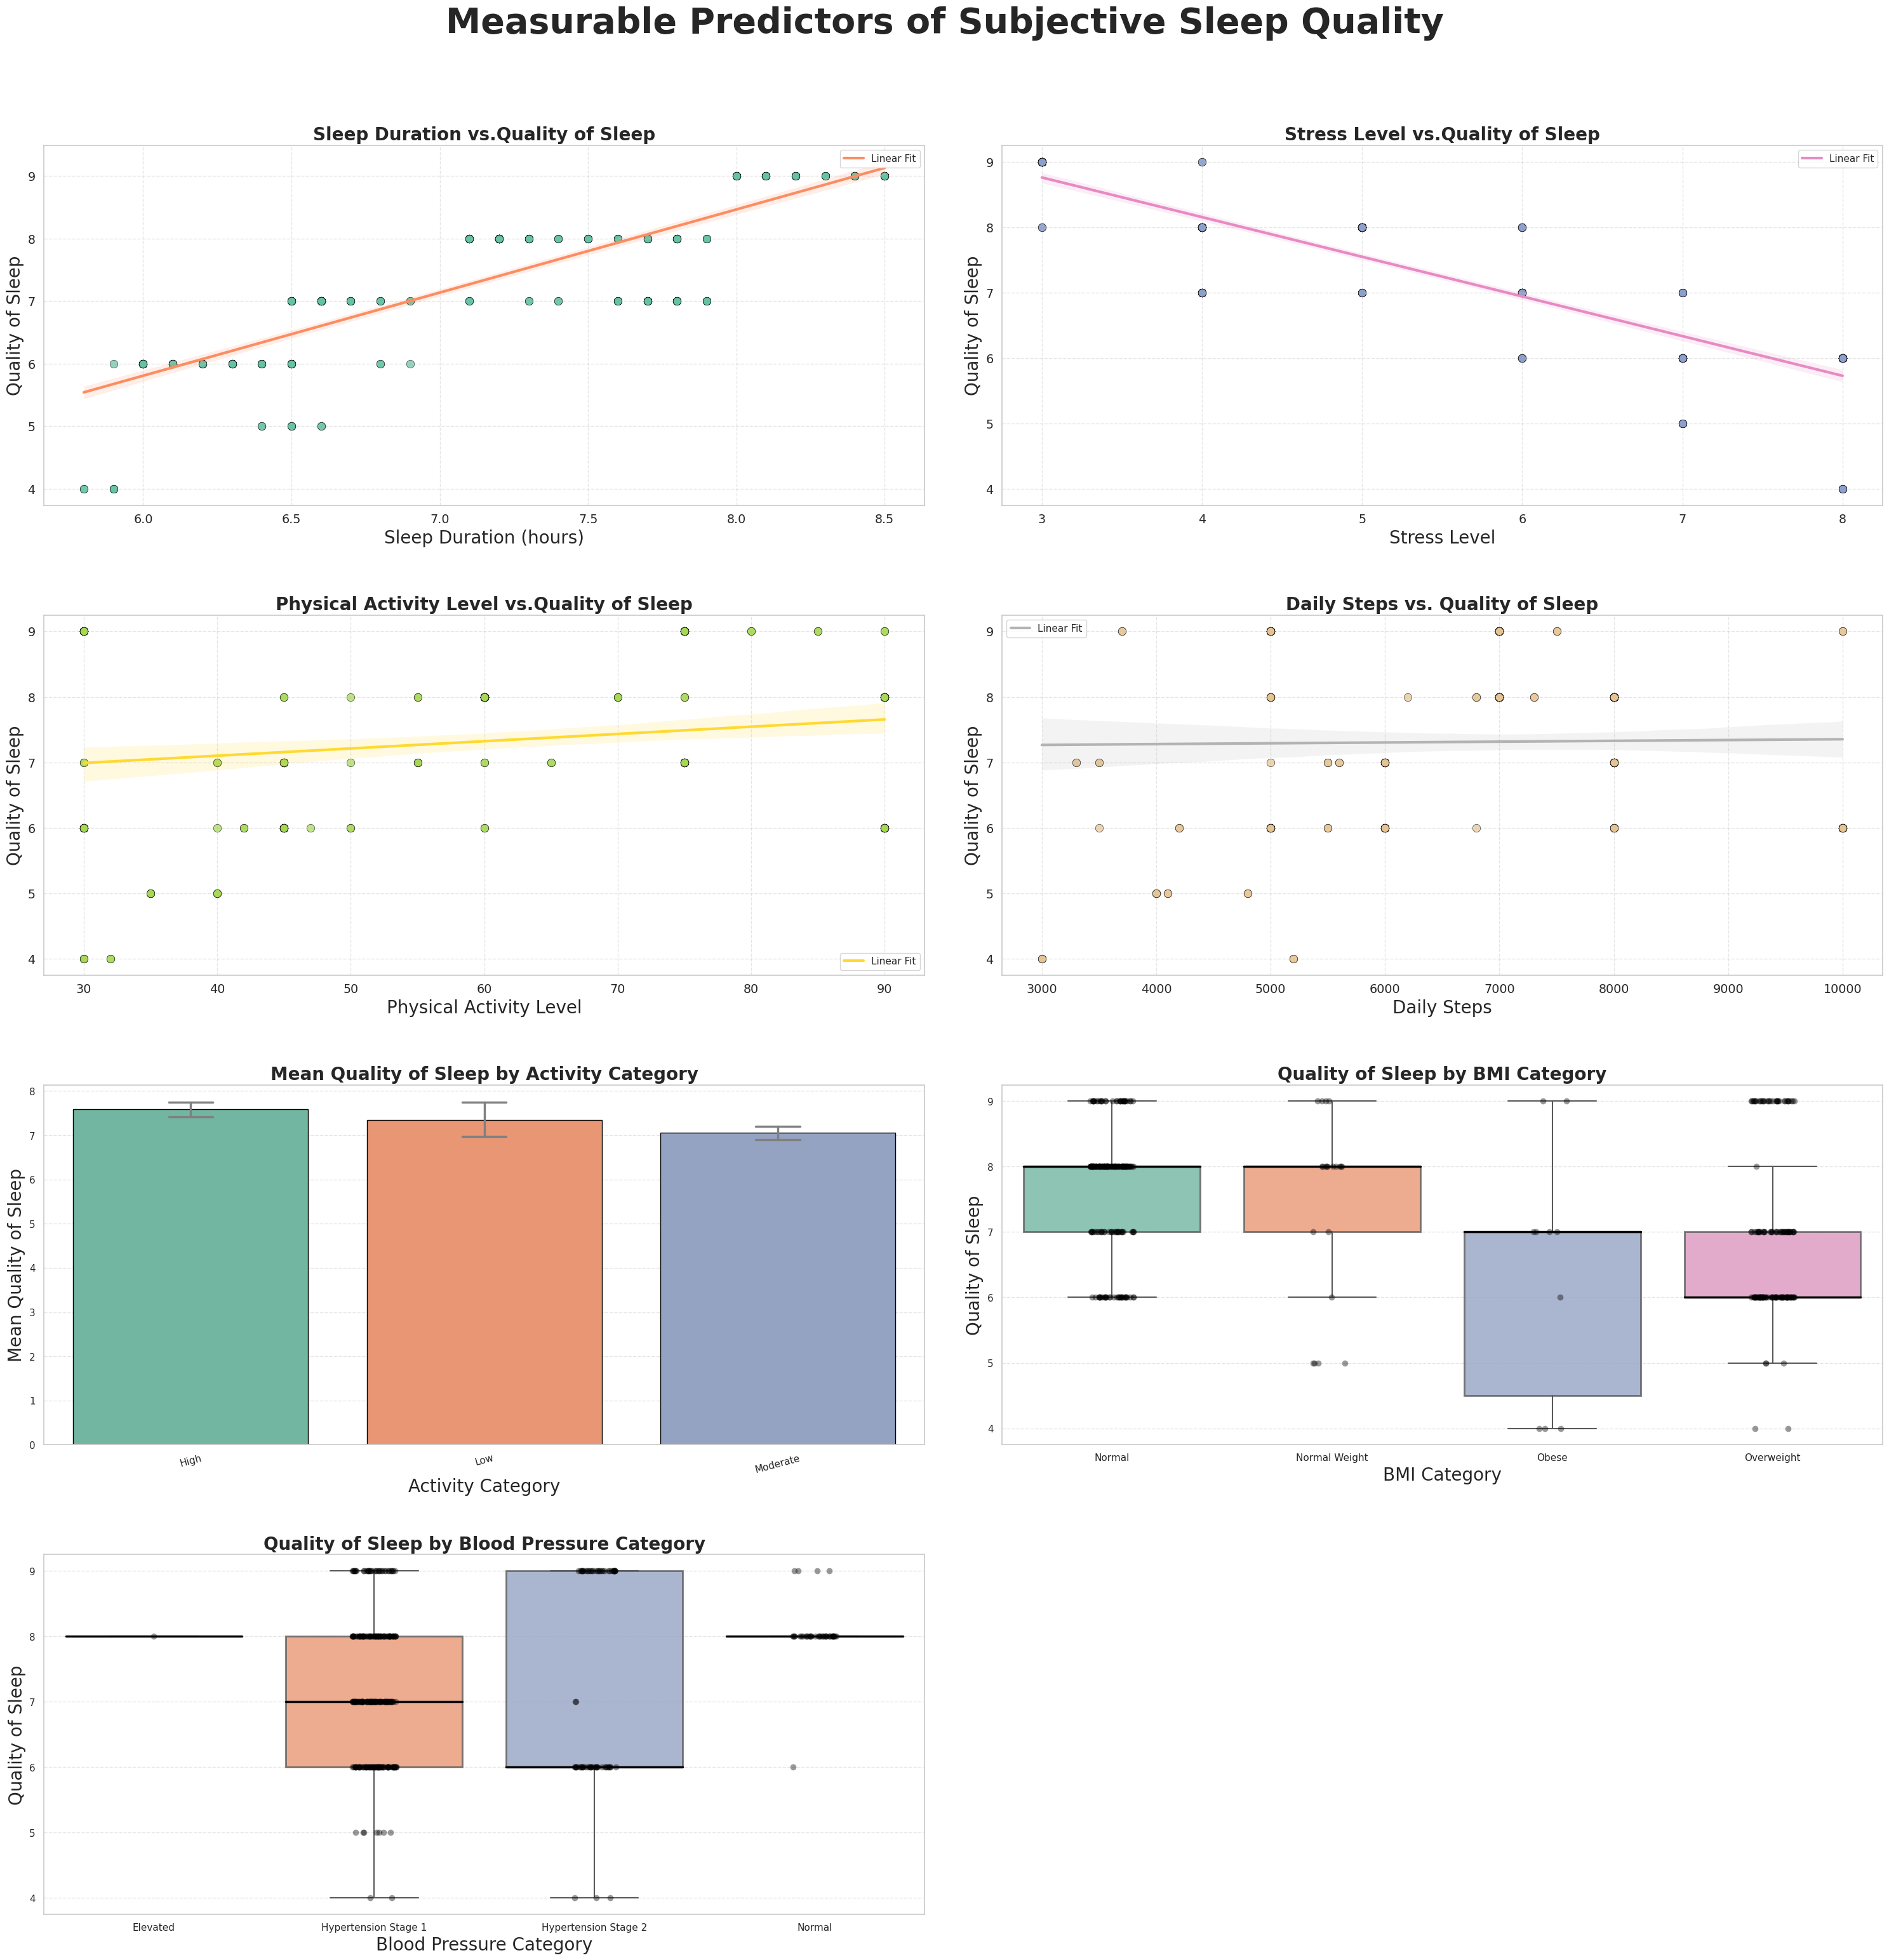

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for clarity and accessibility
sns.set(style="whitegrid", palette="Set2", font_scale=1.25)

# Create a 4-row, 2-column grid (last subplot will be empty)
fig, axes = plt.subplots(4, 2, figsize=(30,30))
axes = axes.flatten()

# 1. Scatter Plot with Regression: Sleep Duration vs. Quality of Sleep
sns.regplot(
    x='Sleep Duration', y='Quality of Sleep', data=df,
    scatter_kws={'color':'C0', 'alpha':0.7, 's':80, 'edgecolor':'k', 'linewidth':0.5},
    line_kws={'color':'C1', 'lw':3, 'label':'Linear Fit'},
    ax=axes[0]
)
axes[0].set_title('Sleep Duration vs.Quality of Sleep', fontsize=20, fontweight='bold')
axes[0].set_xlabel('Sleep Duration (hours)', fontsize=20)
axes[0].set_ylabel('Quality of Sleep', fontsize=20)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, linestyle='--', alpha=0.5)

# 2. Scatter Plot with Regression: Stress Level vs. Quality of Sleep
sns.regplot(
    x='Stress Level', y='Quality of Sleep', data=df,
    scatter_kws={'color':'C2', 'alpha':0.7, 's':80, 'edgecolor':'k', 'linewidth':0.5},
    line_kws={'color':'C3', 'lw':3, 'label':'Linear Fit'},
    ax=axes[1]
)
axes[1].set_title('Stress Level vs.Quality of Sleep', fontsize=20, fontweight='bold')
axes[1].set_xlabel('Stress Level', fontsize=20)
axes[1].set_ylabel('Quality of Sleep', fontsize=20)
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, linestyle='--', alpha=0.5)

# 3. Scatter Plot with Regression: Physical Activity Level vs. Quality of Sleep
sns.regplot(
    x='Physical Activity Level', y='Quality of Sleep', data=df,
    scatter_kws={'color':'C4', 'alpha':0.7, 's':80, 'edgecolor':'k', 'linewidth':0.5},
    line_kws={'color':'C5', 'lw':3, 'label':'Linear Fit'},
    ax=axes[2]
)
axes[2].set_title('Physical Activity Level vs.Quality of Sleep', fontsize=20, fontweight='bold')
axes[2].set_xlabel('Physical Activity Level', fontsize=20)
axes[2].set_ylabel('Quality of Sleep', fontsize=20)
axes[2].legend(loc='best', fontsize=11)
axes[2].grid(True, linestyle='--', alpha=0.5)

# 4. Scatter Plot with Regression: Daily Steps vs. Quality of Sleep
sns.regplot(
    x='Daily Steps', y='Quality of Sleep', data=df,
    scatter_kws={'color':'C6', 'alpha':0.7, 's':80, 'edgecolor':'k', 'linewidth':0.5},
    line_kws={'color':'C7', 'lw':3, 'label':'Linear Fit'},
    ax=axes[3]
)
axes[3].set_title('Daily Steps vs. Quality of Sleep', fontsize=20, fontweight='bold')
axes[3].set_xlabel('Daily Steps', fontsize=20)
axes[3].set_ylabel('Quality of Sleep', fontsize=20)
axes[3].legend(loc='best', fontsize=11)
axes[3].grid(True, linestyle='--', alpha=0.5)

# 5. Bar Plot: Mean Quality of Sleep by Activity Category (with 95% CI)
# FIX: Use the correct column name and check dtype before using .cat accessor
if 'OverallActivity' in df.columns:
    if hasattr(df['OverallActivity'], 'cat'):
        activity_order = df['OverallActivity'].cat.categories
    else:
        activity_order = sorted(df['OverallActivity'].unique())
else:
    activity_order = None  # fallback

sns.barplot(
    x='ActivityCategory', y='Quality of Sleep', data=df,
    order=activity_order, ci=95, capsize=0.15, palette='Set2', edgecolor='k', errcolor='gray', errwidth=2.5,
    ax=axes[4]
)
axes[4].set_title('Mean Quality of Sleep by Activity Category', fontsize=20, fontweight='bold')
axes[4].set_xlabel('Activity Category', fontsize=20)
axes[4].set_ylabel('Mean Quality of Sleep', fontsize=20)
axes[4].tick_params(axis='x', labelrotation=15, labelsize=11)
axes[4].tick_params(axis='y', labelsize=11)
axes[4].grid(axis='y', linestyle='--', alpha=0.5)

# 6. Boxplot: Quality of Sleep by BMI Category
bmi_order = df['BMI Category'].cat.categories if hasattr(df['BMI Category'], 'cat') else sorted(df['BMI Category'].unique())
sns.boxplot(
    x='BMI Category', y='Quality of Sleep', data=df,
    order=bmi_order, showfliers=False, palette='Set2', boxprops=dict(alpha=0.8, linewidth=2), medianprops=dict(color='black', linewidth=2.5),
    ax=axes[5]
)
sns.stripplot(
    x='BMI Category', y='Quality of Sleep', data=df,
    order=bmi_order, color='k', alpha=0.4, size=7, jitter=True, ax=axes[5]
)
axes[5].set_title('Quality of Sleep by BMI Category', fontsize=20, fontweight='bold')
axes[5].set_xlabel('BMI Category', fontsize=20)
axes[5].set_ylabel('Quality of Sleep', fontsize=20)
axes[5].tick_params(axis='x', labelsize=11)
axes[5].tick_params(axis='y', labelsize=11)
axes[5].grid(axis='y', linestyle='--', alpha=0.5)

# 7. Boxplot: Quality of Sleep by Blood Pressure Category
bp_order = df['BPCategory'].cat.categories if hasattr(df['BPCategory'], 'cat') else sorted(df['BPCategory'].unique())
sns.boxplot(
    x='BPCategory', y='Quality of Sleep', data=df,
    order=bp_order, palette='Set2', showfliers=False, boxprops=dict(alpha=0.8, linewidth=2), medianprops=dict(color='black', linewidth=2.5),
    ax=axes[6]
)
sns.stripplot(
    x='BPCategory', y='Quality of Sleep', data=df,
    order=bp_order, color='k', alpha=0.4, size=7, jitter=True, ax=axes[6]
)
axes[6].set_title('Quality of Sleep by Blood Pressure Category', fontsize=20, fontweight='bold')
axes[6].set_xlabel('Blood Pressure Category', fontsize=20)
axes[6].set_ylabel('Quality of Sleep', fontsize=20)
axes[6].tick_params(axis='x', labelsize=11)
axes[6].tick_params(axis='y', labelsize=11)
axes[6].grid(axis='y', linestyle='--', alpha=0.5)

# Hide the 8th (empty) subplot
axes[7].axis('off')

# Add a main title
fig.suptitle('Measurable Predictors of Subjective Sleep Quality', fontsize=40, fontweight='bold', y=1.03)

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

**Purpose:** The purpose of this collection of plots is to examine how measurable lifestyle and health factors relate to subjective sleep quality. Before building predictive models, the visualizations help determine which variables show meaningful patterns with sleep quality and which appear weak or inconsistent. By splitting the predictors into continuous and categorical variables, the figure allows the viewer to understand the individual influence of sleep duration, stress, physical activity, daily steps, BMI, and blood pressure categories on reported sleep quality.

**Method:** The figure uses a mix of scatterplots with fitted regression lines, bar charts, and boxplots to display relationships between predictors and sleep quality. Linear trend lines help reveal the direction of relationships for numerical variables, while categorical variables are summarized through boxplots and aggregated means. The use of consistent labeling and a minimalist color scheme keeps the focus on comparing how each factor behaves rather than emphasizing any single data point.

**Interpretation:** Several predictors show clear directional trends. Sleep duration has a strong positive association with sleep quality, indicating that longer sleep consistently goes hand in hand with better subjective ratings. Stress level shows the opposite pattern: higher stress is associated with decidedly lower sleep quality. Physical activity reveals a mild positive trend; for the daily steps, there is little measurable impact, as suggested by the flat regression line and scattered points. Also for the categorical factors, differences can be seen: the best sleep is reported by individuals classified as having “High” activity levels, and sleep quality seems particularly low among the obese or hypertensive. Taken together, the figure suggests restorative behaviors (sleep duration, activity) and physiological strain (stress, BMI, blood pressure) track with sleep quality in expected directions.


**Evaluation:**
These visualizations provide a useful first pass at identifying which predictors merit deeper modeling. They highlight strong candidates such as sleep duration and stress level while revealing weaker variables like daily steps, which may add little to predictive performance. Future analysis could incorporate multivariate modeling or stratified views to determine whether certain relationships differ by age, occupation, or disorder type.

#### Figure 4: Impact of Age and Gender on Quality and Duration of Sleep

/tmp/ipykernel_52/3659894438.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Age', y='Quality of Sleep', hue='Gender', ci=None, ax=axes[0, 0])
/tmp/ipykernel_52/3659894438.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Age', y='Sleep Duration', hue='Gender', ci=None, ax=axes[0, 1])


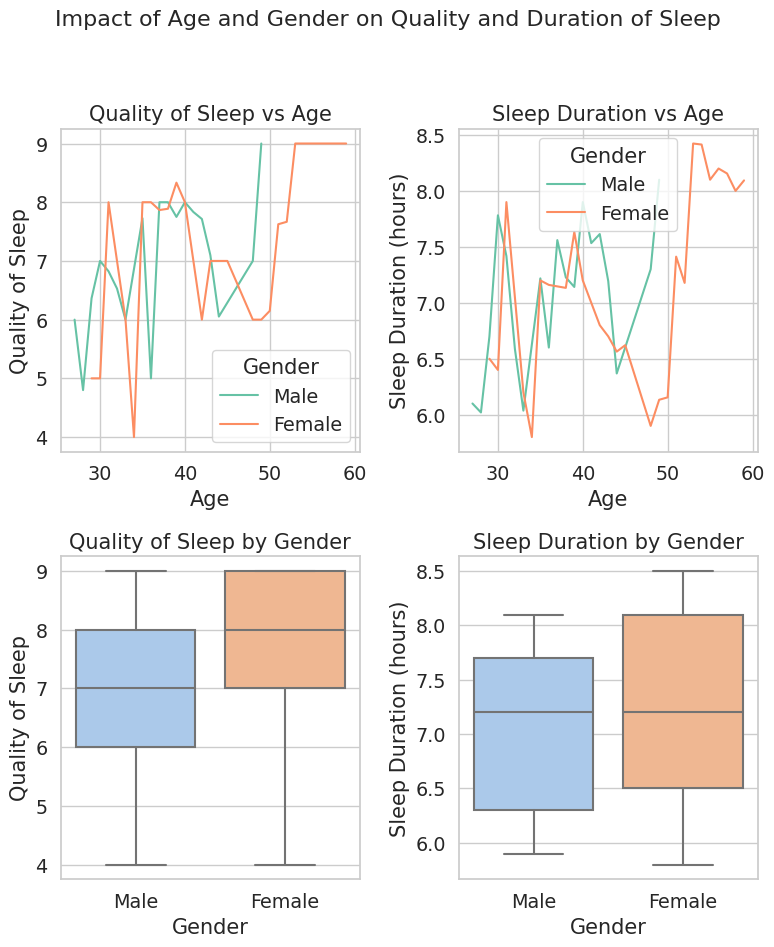

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(8,10))
fig.suptitle('Impact of Age and Gender on Quality and Duration of Sleep', fontsize=16)

# 1. Quality of Sleep by Age (lineplot, no confidence interval)
sns.lineplot(data=df, x='Age', y='Quality of Sleep', hue='Gender', ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Quality of Sleep vs Age')
axes[0, 0].set_ylabel('Quality of Sleep')
axes[0, 0].set_xlabel('Age')

# 2. Sleep Duration by Age (lineplot, no confidence interval)
sns.lineplot(data=df, x='Age', y='Sleep Duration', hue='Gender', ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Sleep Duration vs Age')
axes[0, 1].set_ylabel('Sleep Duration (hours)')
axes[0, 1].set_xlabel('Age')

# 3. Quality of Sleep by Gender (boxplot)
sns.boxplot(data=df, x='Gender', y='Quality of Sleep', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Quality of Sleep by Gender')
axes[1, 0].set_ylabel('Quality of Sleep')
axes[1, 0].set_xlabel('Gender')

# 4. Sleep Duration by Gender (boxplot)
sns.boxplot(data=df, x='Gender', y='Sleep Duration', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Sleep Duration by Gender')
axes[1, 1].set_ylabel('Sleep Duration (hours)')
axes[1, 1].set_xlabel('Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Purpose:** This figure explores how age and gender relate to two sleep outcomes: subjective sleep quality and sleep duration. By pairing age-based line plots with gender-based boxplots, the visualization will help determine whether sleep patterns shift across ages and whether men and women experience these changes differently. These helps will help us in deciding whether demographic characteristics should be included as predictors in models of sleep health.

**Method:** The visualization uses a four-panel layout combining line graphs and boxplots. The top panels plot sleep quality and sleep duration against age separately for men and women, which help to observe how each group’s patterns evolve from their late twenties through their fifties. The bottom panels summarize overall gender differences using boxplots that display medians, quartiles, and outliers. A two-color palette was used to differentiate genders across all plots and keeps the comparisons clear.

**Interpretation:** The figures suggests that sleep quality varies with age for both genders with different patterns. Men show more fluctuation across the age range, including a dip in their early thirties and gradual improvement approaching age fifty. Women exhibit a lower point in their early thirties but generally maintain higher sleep quality during their fifties. The boxplots reinforce this, showing a higher median and greater variability in sleep quality for women. Sleep duration follows a similar pattern: men tend to stay between six and eight hours with several age-specific dips, while women experience slightly longer durations overall and a noticeable peak in their mid-fifties. Gender boxplots indicate only modest differences in typical duration, but again show greater spread among women.

**Evaluation:** Overall, the figures effectively separates age-related trajectories from gender-based graphs. The use of raw lines, rather than smoothed regression curves, preserves the natural variation in the data and avoids noise. The absence of confidence intervals, sample sizes, or uncertainty bands limits the viewer’s ability to assess reliability.


### Predictive/ML Analysis:

The essential goal of this section is to predict the sleep disorder (None, Insomnia, Sleep Apnea) using the demographic, lifestyle, and health-related predictors. We are trying to answer: Which factors are most predictive of sleep disorders, and how well can models distinguish between different sleep disorder types?

The predictors that are going to be input into the model include blood pressure, BMI, physical activity, heart rate, stress level, and sleep duration.

In [14]:
# Cell: imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

# Optional: XGBoost (install if desired: pip install xgboost)
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    xgb_available = False

# display settings
pd.options.display.max_columns = 200
sns.set(style='whitegrid')

df = pd.read_csv('data.csv')

In [15]:
# Cell: parse Blood Pressure -> Systolic, Diastolic; create Pulse_Pressure (from columns)
# Split the 'Blood Pressure' column (format: "Systolic/Diastolic") into two new columns
df[['SystolicBP', 'DiastolicBP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df['Pulse_Pressure'] = df['SystolicBP'] - df['DiastolicBP']
df[['SystolicBP', 'DiastolicBP', 'Pulse_Pressure']].head()

,SystolicBP,DiastolicBP,Pulse_Pressure
0,126,83,43
1,125,80,45
2,125,80,45
3,140,90,50
4,140,90,50


**Preprocessing:**


In order for the team to prevent missing data, different scales, and imbalance in the category. The team must make sure to preprocess all the predictors before testing.

To ensure reproducibility, all predictors are processed through a preprocessing pipeline where
- Numeric variables are imputed using the median and standardized using `StandardScaler` from sklearn.
- Categorical variables are imputed with a constant variable `"Unknown"` and transformed with one-hot encoding.
- The team used `ColumnTransformer`, which made sure that all the numerical and categorical values were handled correctly with each model.
- The team also used `LabelEncoder` to encode the target variable, which was Sleep Disorder. This encoder followed the following mapping:
`Label mapping: {'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}

In [16]:
# Features and target
TARGET = 'Sleep Disorder'  # multiclass: 'None','Insomnia','Sleep Apnea'
# choose predictors (adjust if your column names differ)
numeric_features = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level',
                    'Stress Level','Heart Rate','Daily Steps','Systolic','Diastolic','Pulse_Pressure']
categorical_features = ['Gender','Occupation','BMI Category']

# Ensure columns exist (drop missing automatically)
numeric_features = [c for c in numeric_features if c in df.columns]
categorical_features = [c for c in categorical_features if c in df.columns]

# Encode sleep disorder labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


X = df[numeric_features + categorical_features].copy()
y = df[TARGET].copy()

NameError: name 'y' is not defined

In [ ]:
# Preprocessing pipelines
num_transform = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_transform = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', num_transform, numeric_features),
    ('cat', cat_transform, categorical_features)
])

**Models Evaluated**

The team chose to use the following models:
- Multinomial Logistic Regression
- Random Forest Classifier
- XGBoost Classifier - team's extra method


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size=0.2, 
    stratify=y_encoded, 
    random_state=42
)

In [ ]:
# Logistic Regression pipeline
pipe_log = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight='balanced'))
])

# Random Forest pipeline
pipe_rf = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'))
])

# Optional XGBoost pipeline
if xgb_available:
    pipe_xgb = Pipeline([
        ('pre', preprocessor),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ])


**Cross-Validation Performance / Resampling:**

To have unbiased estimations, the team made sure to carry out a 5-fold stratified cross-validation for all models. This is done using the `StratifiedKFold` and will help all sleep disorders be balanced within each fold.

These methods refit a model of interest to samples formed from the training set, in order to obtain additional information about the fitted model. Bootstrap and cross-validation give us a peek into the stability and prediction error of our sleep disorder.

The model performance was evaluated with the Macro average F1 Score, which provided us with the following values:

```python
# Example output
print("""
    logistic CV f1_macro: mean=0.860, std=0.043
    RandomForest CV f1_macro: mean=0.832, std=0.037
    XGBoost CV f1_macro: mean=0.838, std=0.034
""")
```

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_scores = cross_val_score(pipe_log, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
print("Logistic CV f1_macro: mean={:.3f}, std={:.3f}".format(log_scores.mean(), log_scores.std()))

rf_scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
print("RandomForest CV f1_macro: mean={:.3f}, std={:.3f}".format(rf_scores.mean(), rf_scores.std()))

if xgb_available:
    xgb_scores = cross_val_score(pipe_xgb, X_train, y_train, cv=cv, scoringa='f1_macro', n_jobs=-1)
    print("XGBoost CV f1_macro: mean={:.3f}, std={:.3f}".format(xgb_scores.mean(), xgb_scores.std()))


According to the results, logistic regression achieved the best generalization performance, while the other two were pretty close. In other words, it shows that most predictors and sleep disorders are linearly predictable. All the models have a really small standard deviation, indicating that the models performed strongly in stabilizing across folds.

The test error is the average error that results from using a statistical learning method to predict the response to a new observation, one that was not used in training the method.

The training error rate is often quite different from the test error rate, and in particular, the former can dramatically underestimate the latter.



**Hyperparameter Tuning for Random Forest:**

The team proceeded on to tuning a random forest using the `GridSearchCV`:

```python
param_grid = {
    'clf__n_estimators': [200, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}
```
And according to our results after going through all 60 fits, we obtained the following output:

```text
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF params: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 500}
Best RF CV f1_macro: 0.8455315256372901
```

In [ ]:
param_grid = {
    'clf__n_estimators': [200, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}
grid = GridSearchCV(pipe_rf, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best RF params:", grid.best_params_)
print("Best RF CV f1_macro:", grid.best_score_)
best_model = grid.best_estimator_

The hypertuning of the random forest helped us improve our model performance from 0.832 to 0.846, indicating our reduction in overfitting values.


**Test-Set Evaluation:**

After tuning our best model, the team retrained our best-performing models on a 20% held-out test set using `confusion_matrix`, `f1_score`, `accuracy_score`, `ConfusionMatrixDisplay`, and precision and recall.

The results obtained indicated the best performance on

- No disorder/None class with the highest accuracy, while insomnia and sleep apnea are often confused.

In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Convert integers back to class names
y_test_names = le.inverse_transform(y_test)
y_pred_names = le.inverse_transform(y_pred)


**Inference - Bootstrap Resampling:**

To quantify uncertainty test performance, the team used bootstrap resampling over 300 iterations and set the test set to generate a 95% confidence interval for macro F1. Doing this will provide an inference on the generalization performance.

The bootstrap is a flexible and powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method. We obtain unique datasets by repeatedly sampling observations from the original dataset with replacement. This allows us to consistently use our dataset without looking for new data.


In [ ]:
# still have to do Bootstrap

**Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test_names, y_pred_names, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='Blues', ax=ax, colorbar=False)

# Fix layering issue (numbers on top of grid)
disp.ax_.images[0].set_zorder(1)
for text in disp.ax_.texts:
    text.set_zorder(2)

# Optional: remove grid lines for cleaner look
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

**Model Limitations**

There are numerous limitations to this model, which include the following:

- The dataset isn't based on clinical data and is meant to demonstrate clinical data. Thus, the results obtained from the model can't be considered real or backed up by "clinical" data. However, the results obtained from the model can be used to further investigate and replicate the same model on real-world data.
- The sample size is less than 500, which limits the complexity of the model.
- There are other predictors, such as caffeine, work schedules, screen time, and more, that aren't taken into account.
- Insomnia and Sleep Apnea seem to have overlapping symptoms, which might be a downside to class separability and makes it hard to distinguish.


___


## **5. Interpretation and Reporting**

The results from both the exploratory data analysis and the predictive modeling help answer the research questions defined at the beginning of the project. The team will be able to identify which factors meaningfully influence sleep outcomes by merging visual insights with model performance metrics, and which predictors contribute most to distinguishing sleep disorder types.

**Key Findings From EDA**

The exploratory analysis showed a number of consistent patterns across the dataset. Sleep duration and stress level exhibited the most straightforward and strongest associations with sleep quality. People sleeping longer tend to report higher sleep quality, while individuals with higher stress scores (across the board) have rated their sleep as poorer. A positive trend of physical activity with sleep quality was also visible; this, however, was weaker than the relationship within the comparisons of sleep duration or stress. Although the heatmap showed differences in average sleep quality across occupations, these patterns were not strong enough to meaningfully influence sleep-disorder classification.

Daily steps did not demonstrate a strong trend with sleep quality. This may indicate that general movement throughout the day is not as strong a factor as intentional exercise. Similarly, BMI category and blood pressure status also showed lower sleep quality across participants classified as overweight or hypertensive, respectively. These visual relationships supported the notion that subjective sleep experience is influenced both by choices regarding lifestyle and cardiovascular health.

Age and gender also revealed some interesting patterns. Both men and women exhibited variation in sleep quality across age, although the median sleep-quality scores were slightly higher for women than for men, also indicating more variability across ages. The pattern for sleep duration was very similar: Women averaged slightly longer sleep. Demographic differences in this direction thus suggest that age and gender may affect sleep outcome, albeit not quite as seriously as the role of stress level or sleep duration.

**Key Findings From Predictive Modeling**

The demographic, lifestyle, and health features were quantified using machine learning models that predict a sleep disorder: Logistic Regression, Random Forest, and XGBoost. The performance of all three models tested was assessed based on stratified 5-fold cross-validation, with the macro F1 score used as a key metric for balancing the scores of the three categories (sleep disorders) equally.

Contrary to our initial expectation, the simpler linear model — Logistic Regression — achieved the highest macro F1 score (0.860) under 5-fold cross-validation, outperforming both Random Forest and XGBoost. This indicates that the key predictors of sleep disorder status (such as stress level, sleep duration, BMI, and heart rate) exhibit predominantly linear and monotonic relationships with the outcome. While the nonlinear models identified similar predictors as important, their additional flexibility did not translate into higher predictive power, suggesting that complex feature interactions are not essential for this dataset

Feature-importance results from Random Forest and XGBoost further showed that stress level, sleep duration, heart rate, and BMI category were consistently among the most important predictors, whereas daily steps and occupation were among the least influential. These findings align closely with the patterns identified in the exploratory analysis and reinforce the conclusion that stress and sleep duration play a central role in distinguishing between sleep disorder categories

The models also showed differences in the separability of the three classes. As expected, class None was easier for the models to distinguish from Insomnia and Sleep Apnea. Both nonlinear models exhibit higher recall and precision for people with no sleep disorder but more confusion between Insomnia and Sleep Apnea. This again shows the closeness of the two disorders based on symptoms in the synthetic dataset and confirms an earlier hypothesis.

**Overall Synthesis**

Taken together, the EDA analyses tell a consistent story. Stress level and sleep duration are the strongest predictors of sleep quality and sleep disorder status. Physical activity, BMI category, and blood pressure contribute in meaningful but secondary ways. Demographic factors such as age and gender add variability but are not the primary drivers.

The predictive modeling results reinforce patterns found in the exploratory visuals. They also highlight the practical limits of the dataset, especially the synthetic nature of the data and the similarity between the two disorder classes. Still, the findings demonstrate that lifestyle and cardiovascular indicators contain enough signal to build reliable classifiers under cross-validation.

**Limitations**

Although the performance of these models is decent, the work has several limitations. Synthetic data lacks real-world noise, measurement errors, and more complex clinical variation. The sample size is modest, at 374 observations, limiting the reliability of high-capacity models. Many categories include occupation or activity bins that are unevenly sized, which reduces generalizability. Lastly, there is considerable overlap between Insomnia and Sleep Apnea, which makes classification by models difficult and suggests future efforts should emphasize richer physiological data. Practical Implications While not clinical in nature, there are a few actionable ideas that might come from these results for future studies or health-related applications: stress management interventions, improved sleep hygiene, or targeted support for those with high BMIs or increased blood pressure may be of value in improving sleep outcomes. These findings would therefore indicate that wearable or daily lifestyle data, when combined with cardiovascular indicators, could meaningfully contribute to early screening models for sleep disorders.

## **6. Reproducibility & Contribution Report**

**GitHub:**

**Docker:**

**Contribution Report:**
Likith:
Jyo:

Things to do:
~~- Defining questions~~
- Data Collection: - Jyo
    - mention how we looked everywhere about how the dataset was generated - mention it
    - How the data was generated
- Data Cleaning: - Jyo
    - Why do we clean the data
    - Outliers and invalid rows
    - explicitly state why we added columns to data collection
- Data Analysis: - Likith 
    - A summary table of all the model's results
    - explain the ML and cross-validation
    - Explain XBoost
    - Limitations for each model - Jyo
- Interpretation - Likith
  - Overarching question of
  - Simplify the data and clean it
  - create simple visualizations
  - come to basic visual conclusions - EDA - interpreting each factor - breaking them down
  - We did this to select what select the predictors for ML model
- Docker
- Slides
- 


Answer: Across 5-fold stratified cross-validation, all models exhibited strong generalization, as evidenced by the low standard deviation of macro F1 scores (0.034–0.043). This indicates that model performance is stable across different subsets of the data and is not overly sensitive to the specific training split.